In [3]:
import numpy as np
import corner
import matplotlib.pyplot as plt
from protomidpy import data_gridding
import matplotlib.pyplot as plt
from scipy import interpolate
import numpy as np
import os
import glob
import matplotlib as mpl
ARCSEC_TO_RAD= 1/206265.0
arcsec2_sr_10_10 =1/(2.350443 * 10**(-1))

mpl.rcParams['figure.autolayout'] = False
mpl.rcParams['font.family'] = ['Times New Roman']
mpl.rcParams['mathtext.fontset'] = 'cm'
mpl.rcParams['mathtext.default'] = 'it'
mpl.rcParams['font.size'] = 18


## Files outputed from run_sampling.py & model_calc.py
samplefile = "./result/AS209_continuum_averaged.vis_mcmc.npz"
modelfile = "./result/AS209_continuum_averagedmodel.npz"


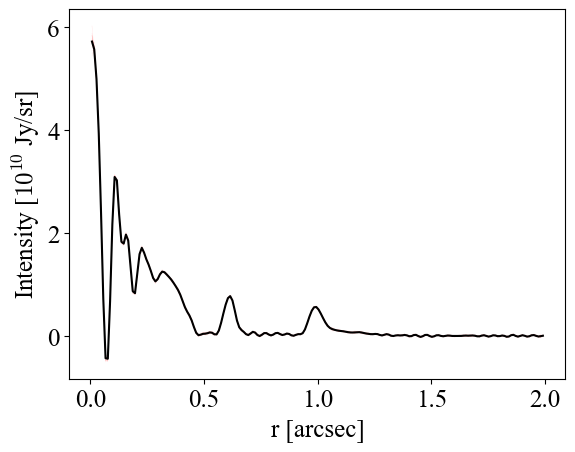

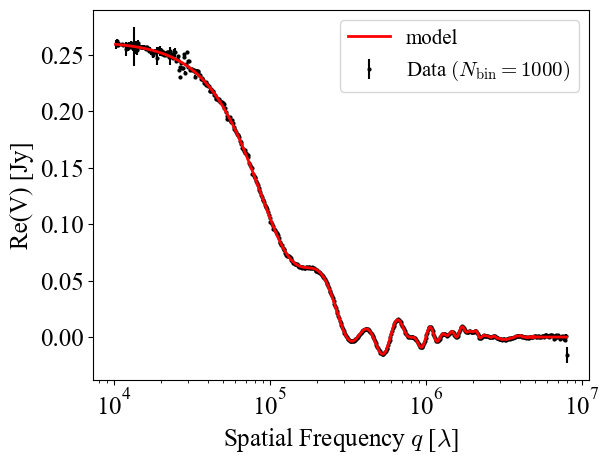

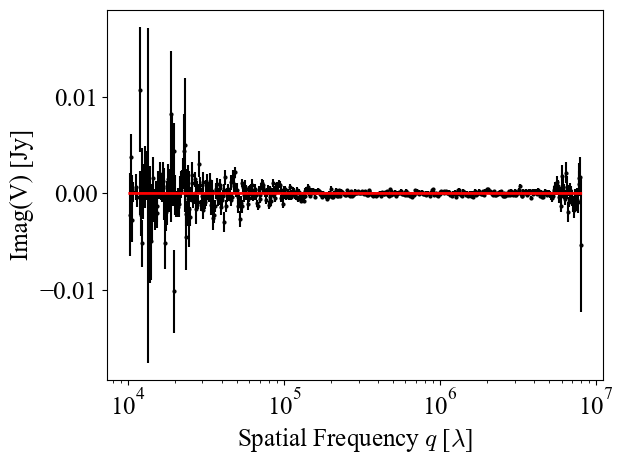

In [5]:

# Plot intensity profile. We plot a bunch for intensity profiles from potesterior distribution and its mean
## Data load
result_npz = np.load(modelfile )
flux_rad_sample = result_npz["flux_random_samples"]
flux_rad_mean = np.mean(flux_rad_sample, axis=0)
flux_rad_percentile = np.percentile(flux_rad_sample, [10, 90], axis =0, )
r_arr = result_npz["r_n"]/ARCSEC_TO_RAD

## Plot
fig, ax = plt.subplots()
for i in range(len(flux_rad_sample)):
    plt.plot(r_arr, flux_rad_sample[i]*arcsec2_sr_10_10, color="r", alpha=0.1, lw = 0.3)

plt.plot(r_arr, flux_rad_mean*arcsec2_sr_10_10, color="k")
plt.xlabel("r [arcsec]")
plt.ylabel("Intensity [$10^{10}$ Jy/sr]")
plt.show()


# Plot model and observed visibility in deprojected frame. For the model, we consider one intensity profile assuming MAP solution for geometry & hyperparameters
## Data load
q_dist = result_npz["qdist_deprojected"]
order = np.argsort(q_dist)
vis_model_dpeorjected = result_npz["vis_model_deprojected"]
data_dpeorjected = result_npz["data_deprojected"]
weights = result_npz["data_weights"]


## Data Binning for plot 
qmin = 100
qmax = 10**7
n_d_log = 1000
coord_for_grid = data_gridding.log_gridding_1d(qmin, qmax, n_d_log)
x_masked, vis_grid_1d, noise_grid_1d, d_data, sigma_mat_1d= data_gridding.data_binning_1d(q_dist, data_dpeorjected, weights, coord_for_grid)

## PLot real part
plt.errorbar(x_masked, vis_grid_1d.real, yerr = noise_grid_1d.real, fmt="o", color="k",markersize=2, label=r"Data $(N_{\rm bin}=%d)$" % n_d_log)
plt.plot(q_dist[order], vis_model_dpeorjected[order].real, lw =2, color="r", zorder = 100, label="model")
plt.xscale("log")
plt.ylabel("Re(V) [Jy]")
plt.xlabel("Spatial Frequency $q$ [$\lambda$]")
plt.legend(fontsize = 15)
plt.show()

## Plot imaginary part
plt.errorbar(x_masked, vis_grid_1d.imag, yerr = noise_grid_1d.real, fmt="o", color="k",markersize=2, label=r"Data $(N_{\rm bin}=%d)$" % n_d_log)
plt.plot(q_dist[order], vis_model_dpeorjected[order].imag, lw =2, color="r", zorder = 100, label="model")
plt.xscale("log")
plt.ylabel("Imag(V) [Jy]")
plt.xlabel("Spatial Frequency $q$ [$\lambda$]")
plt.legend(fontsize = 15)
plt.show()



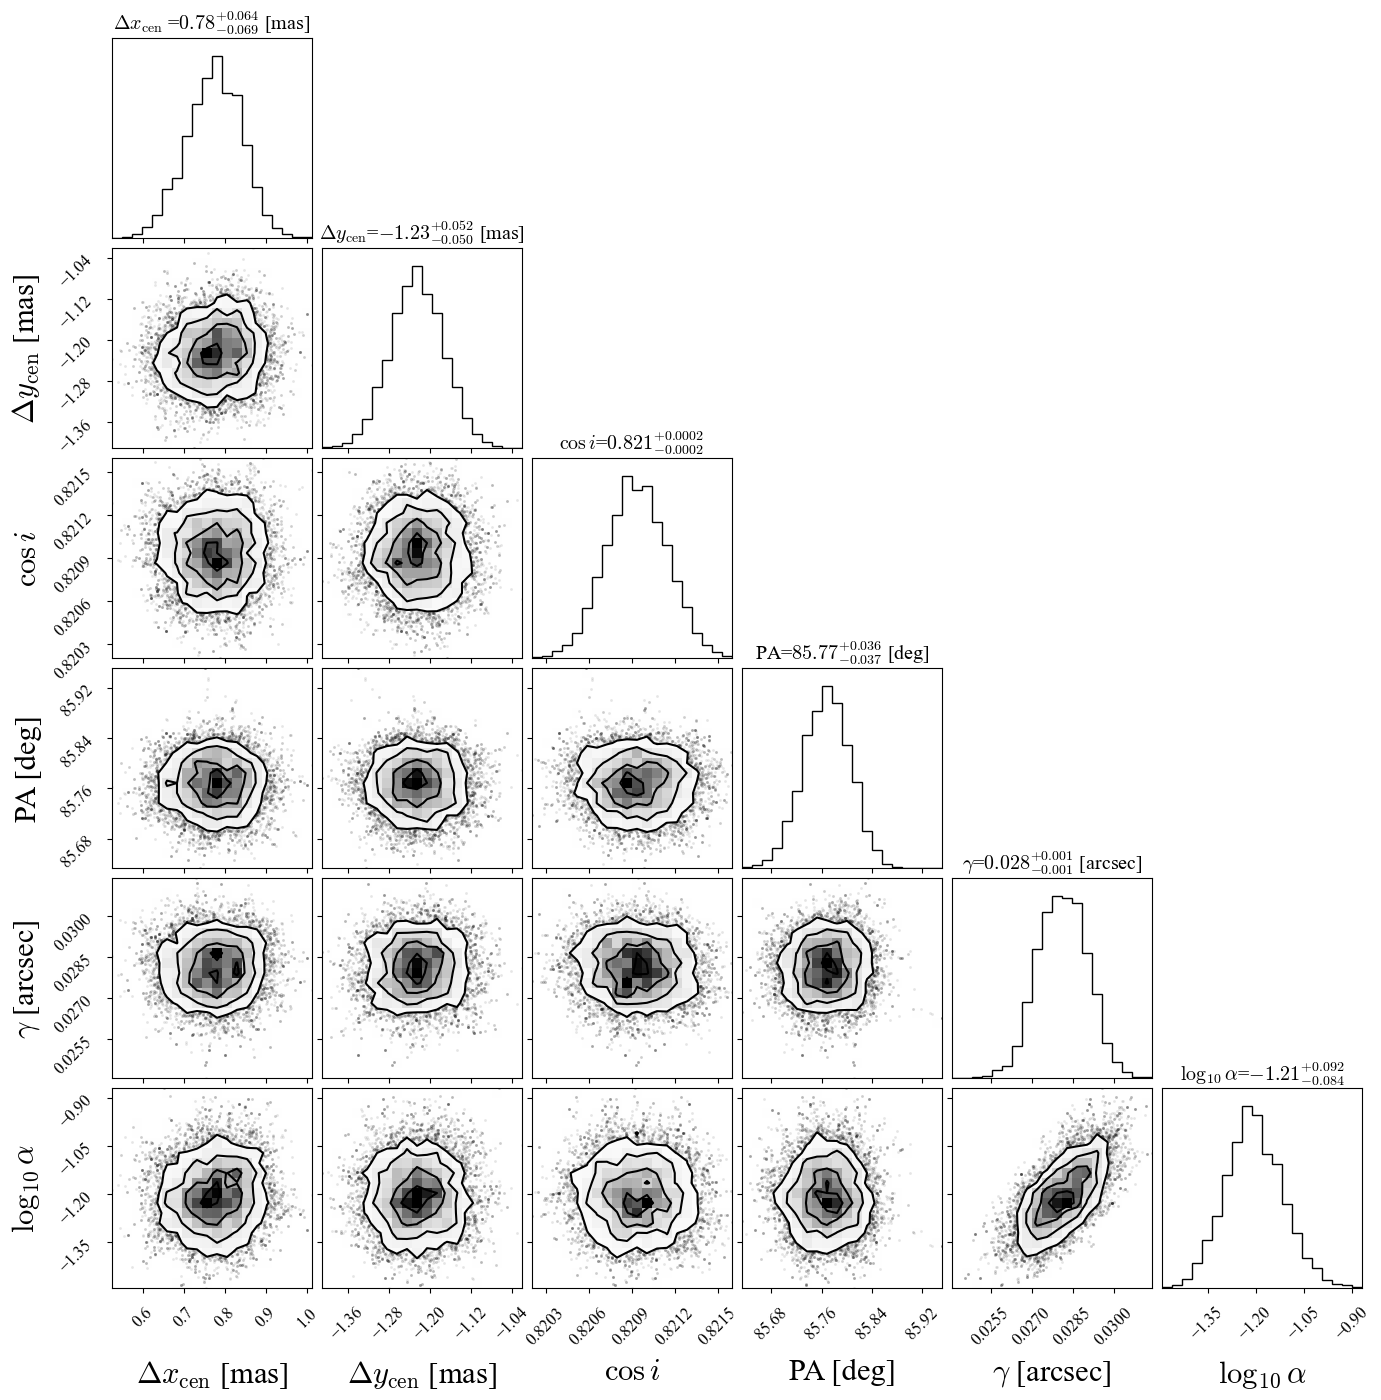

In [9]:
mpl.rcParams['font.size'] = 12
mpl.rcParams['xtick.major.pad']='8'
mpl.rcParams['ytick.major.pad']='8'

sample = np.load(samplefile)["sample"]

sample_copy = np.zeros_like(sample)
sample_copy[:,0] = sample[:,4] *1000
sample_copy[:,1] = sample[:,5] * 1000
sample_copy[:,2] = sample[:,2] 
sample_copy[:,3] = sample[:,3] *180 /np.pi
sample_copy[:,4] = sample[:,0]
sample_copy[:,5] = sample[:,1]


title =[r"$\Delta x_{\rm cen}$ ", r"$\Delta y_{\rm cen}$", r"$\cos i$", "PA", r"$\gamma$", r"$\log_{10} \alpha$" ]
labels =[r"$\Delta x_{\rm cen}$ [mas]", r"$\Delta y_{\rm cen}$ [mas]", r"$\cos i$", "PA [deg]", r"$\gamma$ [arcsec]", r"$\log_{10} \alpha$" ]
plot_sample = sample_copy[12000:]
label_kwargs = dict(fontsize=22)
figure = corner.corner(plot_sample, labels=labels,label_kwargs=label_kwargs, labelpad=0.05 )
ndim = 6
axes = np.array(figure.axes).reshape((ndim, ndim))

for i in range(ndim):
    ax = axes[i, i]
    vals = np.percentile(plot_sample[:,i], [16,50,84])
    if i==0 or i==1:
        ax.set_title(r"%s=$%.2f^{+%.3f}_{-%.3f}$ [mas]" % (title[i], vals[1], vals[2]-vals[1], vals[1]-vals[0]))
    elif i==2:
        ax.set_title(r"%s=$%.3f^{+%.4f}_{-%.4f}$" % (title[i], vals[1], vals[2]-vals[1], vals[1]-vals[0]))
    elif i==3:
        ax.set_title(r"%s=$%.2f^{+%.3f}_{-%.3f}$ [deg]" % (title[i], vals[1], vals[2]-vals[1], vals[1]-vals[0]))
    elif i==4:
        ax.set_title(r"%s=$%.3f^{+%.3f}_{-%.3f}$ [arcsec]" % (title[i], vals[1], vals[2]-vals[1], vals[1]-vals[0]))
    elif i==5:
        ax.set_title(r"%s=$%.2f^{+%.3f}_{-%.3f}$" % (title[i], vals[1], vals[2]-vals[1], vals[1]-vals[0]))

plt.show()